# **project: Providing data-driven suggestions for HR**

### business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Dataset dictionary

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

1. **project owner such as management, users who will use the output of this project, data analysts and scientists, data management and system admins**
2. **I will try to findout why the turnover rate in high among the employees and provide potential solution**
3. **It contains seven variables and one target, 14999 entries and 3008 duplicates**
4. **The dataset and python libraries**
5. **The data contains no personal id information so individual employees will not be identified from the data. I don't find anything can be ethically concerned.**

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# import data and load into dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns for convennience
df0 = df0.rename(columns = {'Work_accident':'work_accident', 
                            'average_montly_hours': 'avg_monthly_hrs',
                            'time_spend_company': 'tenure',
                            'Department':'dept'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect duplicates
dups = df0[df0.duplicated()].sort_values(by=df0.columns.tolist())
dups.head(10)

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low
14688,0.09,0.79,6,275,4,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe
df1 = df0.drop_duplicates(keep='first')

In [11]:
df1.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df1.shape

(11991, 10)

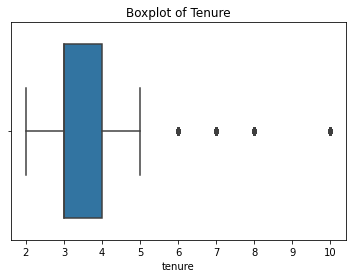

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure'])
plt.title('Boxplot of Tenure')
plt.show()


In [14]:
# Determine the number of rows containing outliers

pct25 = df1['tenure'].quantile(0.25)
pct75 = df1['tenure'].quantile(0.75)

print(pct25, pct75)

#interquartile range
iqr = pct75 - pct25

#upper and lower limit
upper = pct75 + 1.5 * iqr
lower = pct25 - 1.5 * iqr

print('upper limit: ', upper)
print('lower limit: ', lower)

outliers = df1[(df1['tenure']>upper)|(df1['tenure']<lower)]

print('# of outliers: ', len(outliers))

3.0 4.0
upper limit:  5.5
lower limit:  1.5
# of outliers:  824


In [15]:
# Get numbers of people who left vs. stayed
left = df1[df1['left']==1]
stayed = df1[df1['left']==0]
print('# of stayed: ', len(stayed))
print('# of left: ', len(left))

# Get percentages of people who left vs. stayed
pct_left = len(left)/len(df1)
print('percentage of employees left: {:.2%}'.format(pct_left))

# of stayed:  10000
# of left:  1991
percentage of employees left: 16.60%


In [16]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

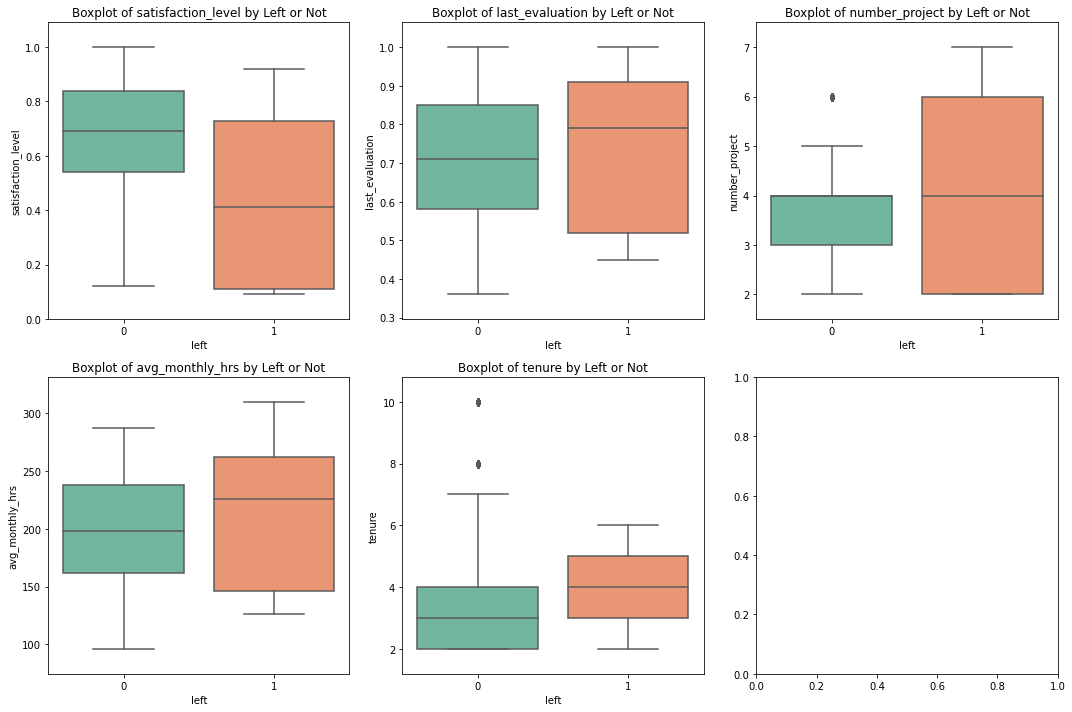

In [17]:
# compare stayed vs left in each non-binary attribute to get an overview of the dataset
attributes = ['satisfaction_level', 'last_evaluation', 'number_project', 'avg_monthly_hrs', 'tenure']
fig, axes = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
axes = axes.flatten()


for i, attr in enumerate(attributes):
    sns.boxplot(x='left',
                y=attr,
                data=df1,
                palette='Set2',
                ax=axes[i]
                )
    axes[i].set_title(f'Boxplot of {attr} by Left or Not')
    axes[i].set_xlabel('left')
    axes[i].set_ylabel(attr)
    
    min_val = df1[attr].min()
    max_val = df1[attr].max()
    margin = (max_val - min_val)/10
    axes[i].set_ylim(min_val-margin, max_val+margin)
    plt.tight_layout
    
plt.show()


1. **left ones have much lower average satisfaction level, and wider spread. Somewhat satisfied employee also leave the company.**
2. **left ones have higher evaluation score, and also wider spread. So maybe them don't feel they are valued.**
3. **left ones have similar averge projects, but a much wider spread. Some of them are given a lot of projects, some very few.**
4. **left ones have higher average work hrs, also wider spread.**
5. **left ones have higer average tenure, and similar spread. So more senior employees left the company.**

In [18]:
# calculate the percentage of left employee in each department
# Group by department and target, then count occurrences
grouped_dept = df1.groupby(['dept', 'left']).size().reset_index(name='Count')

# Calculate percentages within each department
grouped_dept['Percentage'] = grouped_dept.groupby('dept')['Count'].transform(lambda x: x / x.sum() * 100)

print(grouped_dept[grouped_dept['left']==1])

           dept  left  Count  Percentage
1            IT     1    158   16.188525
3         RandD     1     85   12.247839
5    accounting     1    109   17.552335
7            hr     1    113   18.801997
9    management     1     52   11.926606
11    marketing     1    112   16.641902
13  product_mng     1    110   16.034985
15        sales     1    550   16.980550
17      support     1    312   17.133443
19    technical     1    390   17.379679


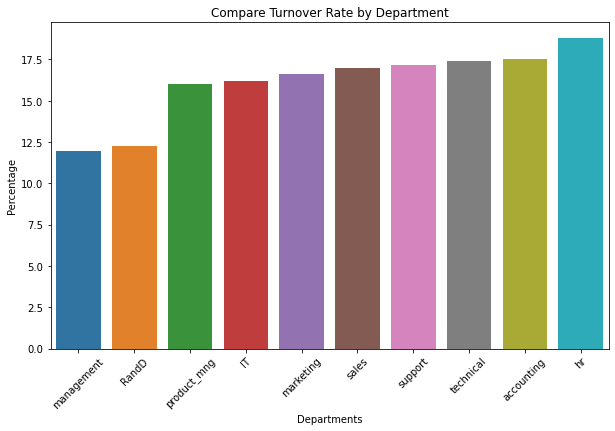

In [19]:
plt.figure(figsize=(10, 6))
grouped_dept = grouped_dept[grouped_dept['left']==1].sort_values(by='Percentage')
sns.barplot(data=grouped_dept, x='dept', y='Percentage')
plt.title('Compare Turnover Rate by Department')
plt.xticks(rotation=45)
plt.xlabel('Departments')
plt.show()

**The difference between departments are not very significant. Except the management and RandD have lower turnover rate**

Observation:

They are about the same while RandD and management have lower percentage left. HR has the highest turnover rate, but not by a large margin.

In [20]:
grouped_salary = df1.groupby(['salary', 'left']).size().reset_index(name='Count')

# Calculate percentages within each category
grouped_salary['Percentage'] = grouped_salary.groupby('salary')['Count'].transform(lambda x: x / x.sum() * 100)

print(grouped_salary)

   salary  left  Count  Percentage
0    high     0    942   95.151515
1    high     1     48    4.848485
2     low     0   4566   79.547038
3     low     1   1174   20.452962
4  medium     0   4492   85.383007
5  medium     1    769   14.616993


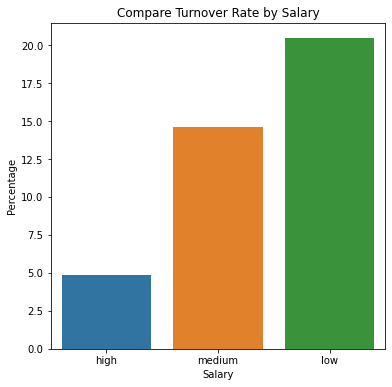

In [21]:
plt.figure(figsize=(6, 6))
grouped_salary = grouped_salary[grouped_salary['left']==1].sort_values(by='Percentage')
sns.barplot(data=grouped_salary, x='salary', y='Percentage')
plt.title('Compare Turnover Rate by Salary')
plt.xlabel('Salary')
plt.show()

**Obviously, salary plays a big role here. Higher salary means lower turnover.**

In [22]:
# no promotion
grouped_promo = df1.groupby(['promotion_last_5years', 'left']).size().reset_index(name='Count')

# Calculate percentages within each category
grouped_promo['Percentage'] = grouped_promo.groupby('promotion_last_5years')['Count'].transform(lambda x: x / x.sum() * 100)

print(grouped_promo)

   promotion_last_5years  left  Count  Percentage
0                      0     0   9805   83.177808
1                      0     1   1983   16.822192
2                      1     0    195   96.059113
3                      1     1      8    3.940887


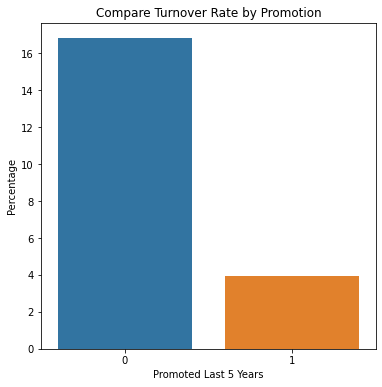

In [23]:
plt.figure(figsize=(6, 6))
grouped_promo = grouped_promo[grouped_promo['left']==1].sort_values(by='Percentage')
sns.barplot(data=grouped_promo, x='promotion_last_5years', y='Percentage')
plt.title('Compare Turnover Rate by Promotion')
plt.xlabel('Promoted Last 5 Years')
plt.show()

**Promotion also plays a big role here.**

In [24]:
# how accident affect turnover
grouped_accident = df1.groupby(['work_accident', 'left']).size().reset_index(name='Count')

grouped_accident['Percentage'] = grouped_accident.groupby('work_accident')['Count'].transform(lambda x: x / x.sum() * 100)

print(grouped_accident)

   work_accident  left  Count  Percentage
0              0     0   8255   81.402229
1              0     1   1886   18.597771
2              1     0   1745   94.324324
3              1     1    105    5.675676


**Interestingly, employee with accidents tend to not leave the company. However, we won't hurt ppl just to make them stay.**

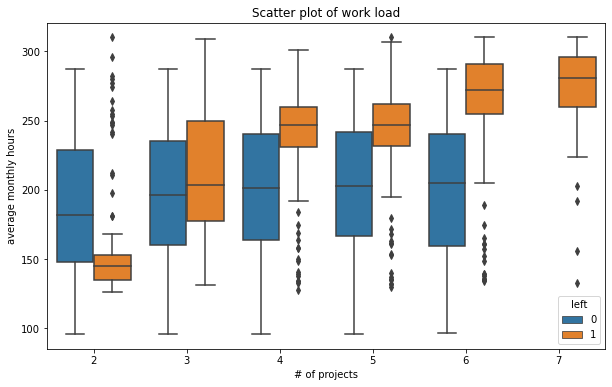

In [25]:
# how is work load affecting turnover
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='number_project', y='avg_monthly_hrs', hue='left')

plt.title('Scatter plot of work load')
plt.xlabel('# of projects')
plt.ylabel('average monthly hours')
plt.show()

1. **more work hours turn to make employees leave. No one can stay if work hours are more than 280hours a month**
2. **less than 150 hours of work per month also leads to high turnover rate.**
3. **More than 6 project make employee leave.**
4. **Same number of projects, but more work hours also push employees away.**

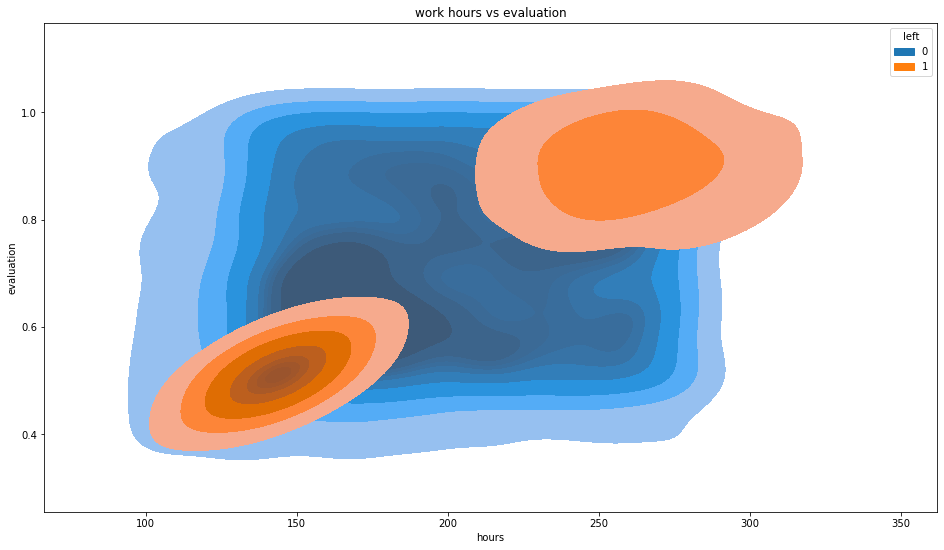

In [26]:
# density of work hours vs evaluation, colored by left or not
plt.figure(figsize=(16, 9))
sns.kdeplot(data=df1, y='last_evaluation', x='avg_monthly_hrs', hue='left', cmap='Blues', fill=True)
plt.title('work hours vs evaluation')
plt.xlabel('hours')
plt.ylabel('evaluation')
plt.show()

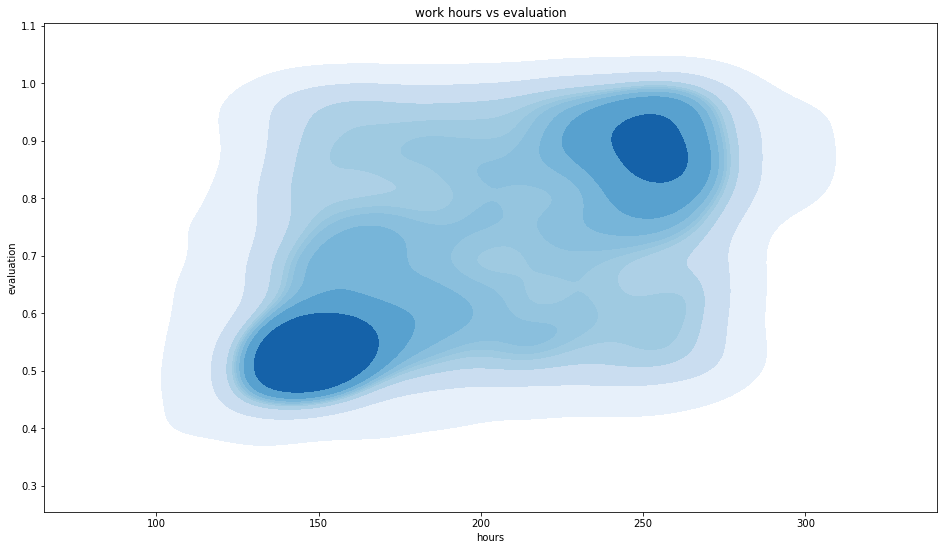

In [27]:
# density of total workforce evaluation
plt.figure(figsize=(16, 9))
sns.kdeplot(data=df1, y='last_evaluation', x='avg_monthly_hrs', cmap='Blues', fill=True)
plt.title('work hours vs evaluation')
plt.xlabel('hours')
plt.ylabel('evaluation')
plt.show()

1. **Employees with high work hours/high evaluations and low work hours/low evalutions tend to leave**
2. **evaluations are highly polorized on the two end, and highly correlated with work hours**

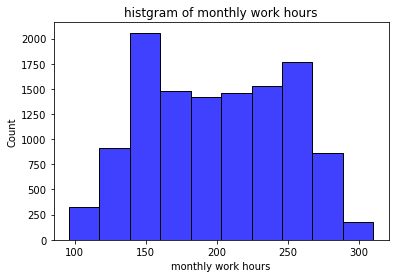

In [28]:
#histgram of work hours
sns.histplot(data=df1['avg_monthly_hrs'], bins=10, color ='blue')
plt.title('histgram of monthly work hours')
plt.xlabel('monthly work hours')
plt.show()

**The majority of employees work very high hours, much more than 160hours per month.**

In [29]:
#do high work hour, high evaluation employees get paid more or get promotion?
min_hr = df1['avg_monthly_hrs'].min()
max_hr = df1['avg_monthly_hrs'].max()
step_hr = (max_hr - min_hr)/3
print(min_hr, max_hr, step_hr)
min_eval = df1['last_evaluation'].min()
max_eval = df1['last_evaluation'].max()
step_eval = (max_eval - min_eval)/3
print(min_eval, max_eval, step_eval)

96 310 71.33333333333333
0.36 1.0 0.21333333333333335


In [30]:
#calculate the high salary of top 1/3 work hr and evaluation compare to the average
df_hi = df1[(df1['avg_monthly_hrs']>239)&(df1['last_evaluation']>0.79)]
# df_hi.head()
#average percentage of high salary
pct_hi = len(df1[df1['salary']=='high'])/len(df1)
pct_up = len(df1[df1['promotion_last_5years']==1])/len(df1)
print('average percentage of high salary: {:.2%}'.format(pct_hi))
print('average percentage of promotion: {:.2%}'.format(pct_up))
pct_hi2 = len(df_hi[df_hi['salary']=='high'])/len(df_hi)
pct_up2 = len(df_hi[df_hi['promotion_last_5years']==1])/len(df_hi)
print('percentage of high salary in high hour high evaluation employees: {:.2%}'.format(pct_hi2))
print('percentage of promotion in high hour high evaluation employees: {:.2%}'.format(pct_up2))

average percentage of high salary: 8.26%
average percentage of promotion: 1.69%
percentage of high salary in high hour high evaluation employees: 6.19%
percentage of promotion in high hour high evaluation employees: 1.31%


In [31]:
data = {'category':['avg', 'high hr high eval'],
        'pct_highsalary': [0.0826, 0.0169],
        'pct_promotion':[0.0619, 0.0131]}

df2 = pd.DataFrame(data)
df2

,category,pct_highsalary,pct_promotion
0,avg,0.0826,0.0619
1,high hr high eval,0.0169,0.0131


Text(0, 0.5, 'percentage')

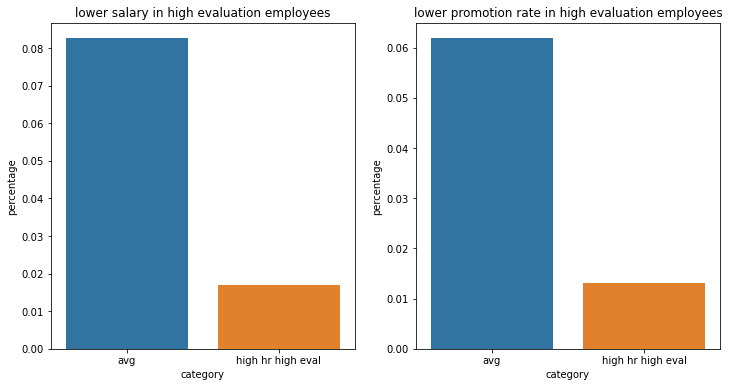

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=df2, x='category', y='pct_highsalary', ax=axes[0])
axes[0].set_title('lower salary in high evaluation employees')
axes[0].set_ylabel('percentage')

sns.barplot(data=df2, x='category', y='pct_promotion', ax=axes[1])
axes[1].set_title('lower promotion rate in high evaluation employees')
axes[1].set_ylabel('percentage')

1. **high evaluation, high hours employees tend to leave and their salary do not match their performance. The percent of high salary and promotion are even lower than the average.**
2. **low hour and low evaluation employess also have high turnover rate. Maybe they are lazy, or maybe they are not given enough work and given low evaluation.**

In [33]:
# where are those low eval, low hours work located?
df6 = df1[(df1['last_evaluation']<0.6)&(df1['avg_monthly_hrs']<170)]
df6.shape

(1797, 10)

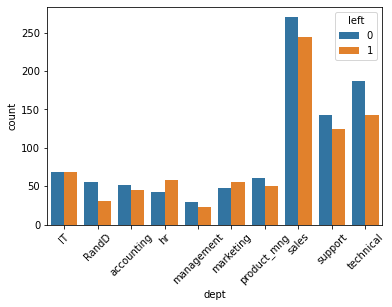

In [34]:
df6B = df6.groupby(['dept', 'left']).size().reset_index(name='count')
sns.barplot(data=df6B, x='dept', y='count', hue='left')
plt.xticks(rotation=45)
plt.show()

**The low work hour low eval employees have similar turnover rate across departments, and mostly located in sales, support and techical departments.**

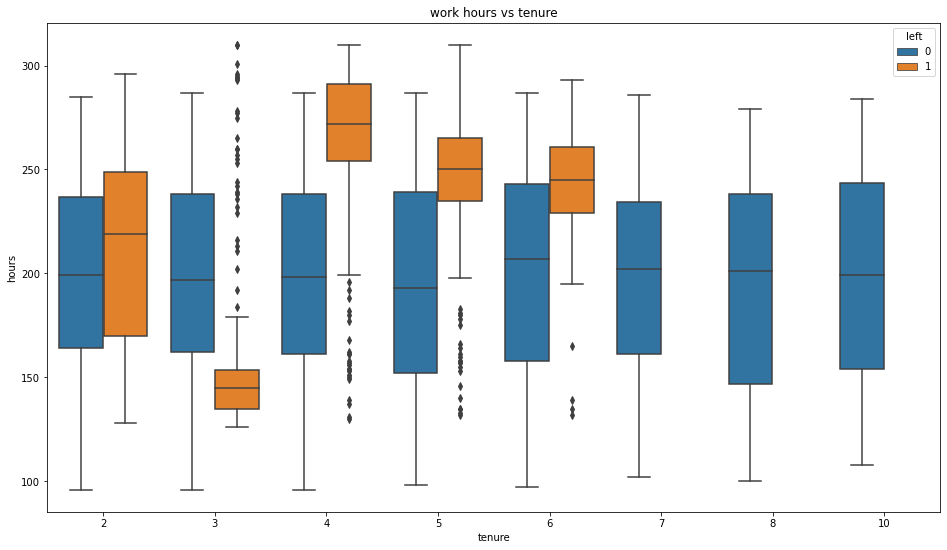

In [36]:
#do high tenure employees want more salary and promotion?
plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='tenure', y='avg_monthly_hrs', hue='left')
plt.title('work hours vs tenure')
plt.xlabel('tenure')
plt.ylabel('hours')
plt.show()

In [47]:
#do more employees tend to leave after longer tenure?
df3 = df1.groupby('tenure')['left'].mean().reset_index(name='pct_left')
df3

,tenure,pct_left
0,2,0.010653
1,3,0.168401
2,4,0.246883
3,5,0.453861
4,6,0.201107
5,7,0.000000
6,8,0.000000
7,10,0.000000


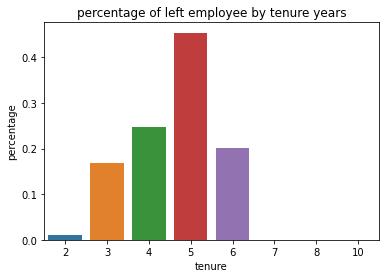

In [48]:
sns.barplot(data=df3, x='tenure', y='pct_left')
plt.title('percentage of left employee by tenure years')
plt.ylabel('percentage')
plt.show()

In [49]:
#show case their average, evaluation salary and promotion by tenure
df4 = df1[df1['tenure']<=6]

mapping = {'low': 0, 'medium':0.5, 'high':1}
df4['salary'] = df4['salary'].map(mapping)
df4.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.5
2,0.11,0.88,7,272,4,0,1,0,sales,0.5
3,0.72,0.87,5,223,5,0,1,0,sales,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0


In [50]:
df5 = df4.groupby(['tenure', 'left']).agg(avg_satisfaction=('salary', 'mean'),
                                          avg_eval=('last_evaluation', 'mean'),
                                          avg_promo=('promotion_last_5years', 'mean'),
                                          avg_salary=('salary', 'mean')).reset_index()
df5


,tenure,left,avg_satisfaction,avg_eval,avg_promo,avg_salary
0,2,0,0.308267,0.717603,0.013546,0.308267
1,2,1,0.306452,0.753548,0.000000,0.306452
2,3,0,0.314991,0.717157,0.019231,0.314991
3,3,1,0.212243,0.522243,0.006865,0.212243
4,4,0,0.317550,0.720444,0.013907,0.317550
5,4,1,0.212121,0.857798,0.002020,0.212121
6,5,0,0.298276,0.702362,0.017241,0.298276
7,5,1,0.231328,0.899564,0.002075,0.231328
8,6,0,0.359122,0.693025,0.025404,0.359122
9,6,1,0.192661,0.908899,0.000000,0.192661


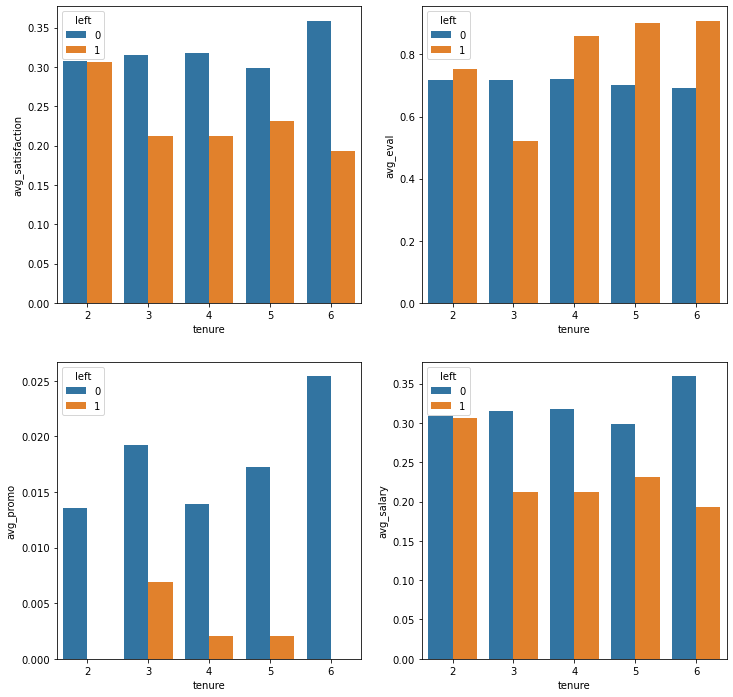

In [51]:
plot_list = ['avg_satisfaction', 'avg_eval', 'avg_promo', 'avg_salary']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, y in enumerate(plot_list):
    sns.barplot(data=df5, x='tenure', y=y, hue='left', ax=axes[i])

plt.show()

1. **Left employees have lower satisfaction except the first two years**
2. **Left employees have higher and higher evaluation except the first two years**
3. **Promoted employees have way lower chances to leave**
4. **Left employees have lower than average salary except the first two years**

In [52]:
df4.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.5
2,0.11,0.88,7,272,4,0,1,0,sales,0.5
3,0.72,0.87,5,223,5,0,1,0,sales,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0


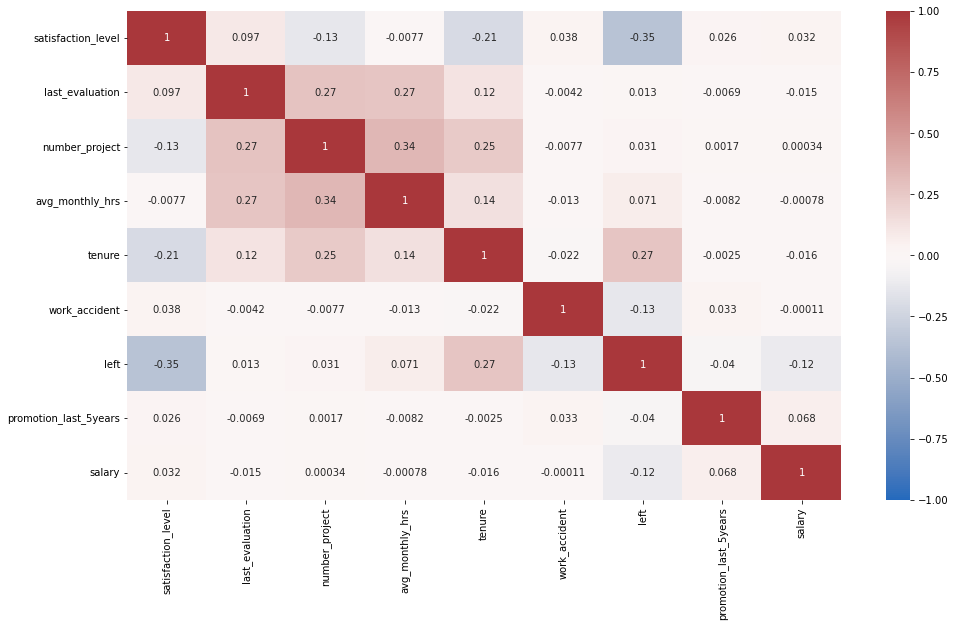

In [53]:
#see correlation of the variables
plt.figure(figsize=(16, 9))
heatmap=sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))

1. **The turnover rate is moderatedly correlated with tenure, and negatively correlated with satisfaction**
2. **satisfaction is negatively correlated with tenure**
3. **It's not very obvious what factor is highly correlated with employee left**

### Insights

1. **There are a few areas may tied to the leaving employees. Very long work hours, too many projects, some employees have high evaluation yet low salary and low promote chances, it seems these factors lead to low satisfaction among leaving employees. It's possible these employees are burned out and didn't think they are valued.**
2. **On the other hand, there are some with low work hours and low evaluation also left the company.** 
3. **Those with moderate high work hours and evaluations seem the most stable group.**
4. **Employee turnover grows gradually after year 2, peak at year 5, and stop after year 6.**

The model will be used to predict whether an employee leaves. The outcome is a left or not binary target so this is a classification problem.

I can either use a logistic regression model or a tree based model.

# Modeling

## prepare the data for modeling

In [64]:
df4.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [65]:
# in the analysis stage, I find that department and accident are not something worth investigate.
# evaluation, work hours, tuenure and num of projects are moderately correlated, I will try different combination to see which ones to drop
# for now, drop dept, accident and num of projects
df_re = df4.drop(['number_project', 'dept', 'work_accident'], axis=1)
# no one left after year 6 in the company, and 6 is considered as outlier in the previous analysis, so we can drop those as well
df_re = df_re[df_re['tenure']<=6]
df_re.shape

(11709, 7)

In [174]:
# extract the target
y = df_re['left']
X = df_re.drop('left', axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

## Logistic Regression

In [175]:
clf = LogisticRegression().fit(X_train, y_train)

In [176]:
y_pred = clf.predict(X_test)

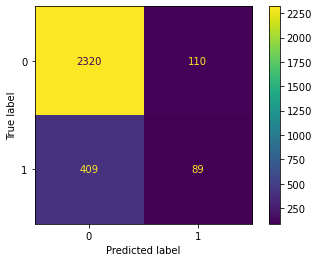

In [177]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [132]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2430
    Predicted would leave       0.47      0.24      0.32       498

                 accuracy                           0.82      2928
                macro avg       0.66      0.59      0.61      2928
             weighted avg       0.79      0.82      0.80      2928



**The regression model has decent overall scores using the test dataset, however, the model doesn't catch the leaving employees very well which is our goal in this project. I will try other models in the future.**

## Tree based model

In [73]:
# Instantiate model
tree = DecisionTreeClassifier()

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[5, 10, 15, 20, None],
             'min_samples_leaf': [1, 2, 5, 10],
             'min_samples_split': [2, 5, 10, 20]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [74]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 7.24 s, sys: 3.2 ms, total: 7.24 s
Wall time: 7.24 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                 

In [75]:
# Check best parameters
tree1.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}

In [80]:
# evaluate the model
y_pred_tree1 = tree1.best_estimator_.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred_tree1, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2430
    Predicted would leave       0.95      0.90      0.93       498

                 accuracy                           0.98      2928
                macro avg       0.96      0.95      0.96      2928
             weighted avg       0.98      0.98      0.98      2928



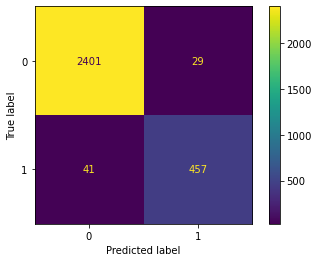

In [178]:
print_cm(tree1, X_test)

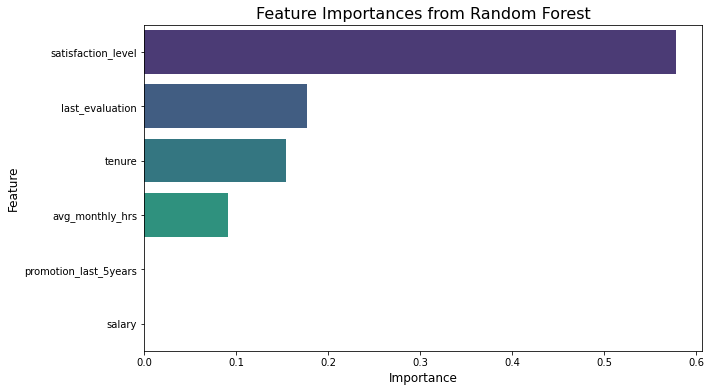

In [87]:
print_importance(tree1, X_test)

## Random Forest

In [150]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [5, 10, 15, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,5,10],
             'min_samples_split': [2,5,10,20],
             'n_estimators': [100, 200, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [142]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 20min 57s, sys: 2.8 s, total: 21min
Wall time: 21min


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [144]:
rf1.best_params_

{'max_depth': 10,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [60]:
path = '/home/jovyan/work/'

In [148]:
write_pickle(path, rf1, 'hr_rf1')

In [172]:
rf1 = read_pickle(path, 'hr_rf1')

In [179]:
y_pred_rf1 = rf1.best_estimator_.predict(X_test)

In [95]:
print('Single Tree Scores: ')
print(classification_report(y_test, y_pred_tree1, target_names=target_names))
print()
print('Random Forest Scores: ')
print(classification_report(y_test, y_pred_rf1, target_names=target_names))

Single Tree Scores: 
                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2430
    Predicted would leave       0.95      0.90      0.93       498

                 accuracy                           0.98      2928
                macro avg       0.96      0.95      0.96      2928
             weighted avg       0.98      0.98      0.98      2928


Random Forest Scores: 
                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2430
    Predicted would leave       0.98      0.90      0.94       498

                 accuracy                           0.98      2928
                macro avg       0.98      0.95      0.96      2928
             weighted avg       0.98      0.98      0.98      2928



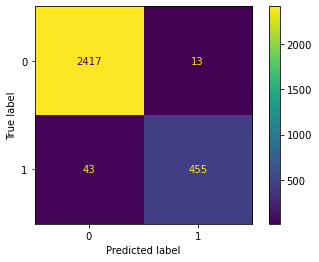

In [180]:
# Generate array of values for confusion matrix
print_cm(rf1, X_test)

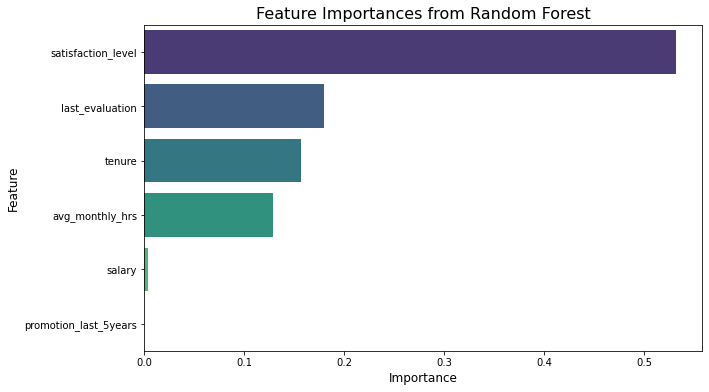

In [90]:
print_importance(rf1, X_test)

1. **The scores generated by decision tree and random forest are all very good predicting both leaving or staying employees.**
2. **The importance plots show that satisfaction is the most decideing factor, followed by evaluation, tenure and work hours.**
3. **It's obvious unsatisfied employees tend to leave, however satisfaction level is a result of all the other factors. Further investigation maybe needed to gether deeper understanding.**

## Second round of tree based models

In [139]:
#drop the satisfaction column
df_re2 = df_re.drop('satisfaction_level', axis=1)

In [181]:
# extract the target
y = df_re2['left']
X = df_re2.drop('left', axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [141]:
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [142]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 5.92 s, sys: 0 ns, total: 5.92 s
Wall time: 5.92 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                 

In [143]:
tree2.best_params_

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [145]:
y_pred_tree2 = tree2.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_tree2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.97      0.96      0.97      2430
    Predicted would leave       0.82      0.85      0.84       498

                 accuracy                           0.94      2928
                macro avg       0.90      0.91      0.90      2928
             weighted avg       0.94      0.94      0.94      2928



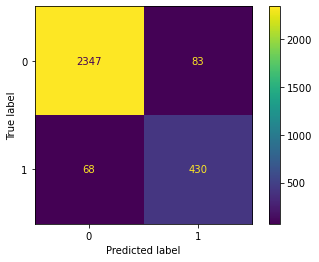

In [182]:
print_cm(tree2, X_test)

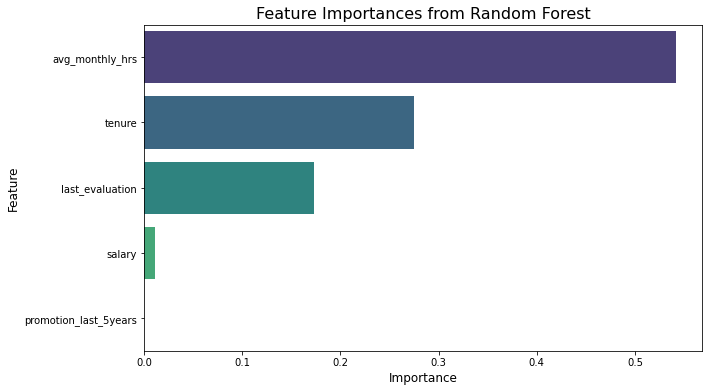

In [148]:
print_importance(tree2, X_test)

In [151]:
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [153]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 23min 21s, sys: 2.64 s, total: 23min 23s
Wall time: 23min 23s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [192]:
write_pickle(path, rf2, 'hr_rf2')

In [185]:
rf2.best_params_

{'max_depth': 10,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 200}

In [186]:
y_pred_rf2 = rf2.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.95      0.97      2430
    Predicted would leave       0.80      0.91      0.86       498

                 accuracy                           0.95      2928
                macro avg       0.89      0.93      0.91      2928
             weighted avg       0.95      0.95      0.95      2928



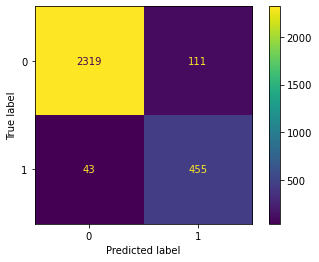

In [187]:
print_cm(rf2, X_test)

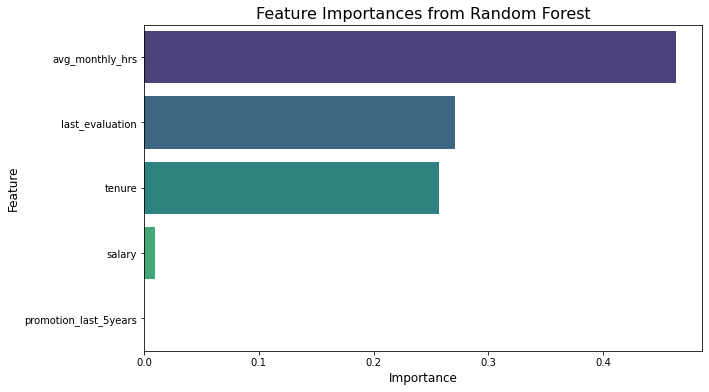

In [188]:
print_importance(rf2, X_test)

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set, which are decent but not great. If only count the prediction of the left employees, the scores drop dramatically due to the imbalanced dataset.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved 94.0% on all four scores on the test set. The random forest slightly outperformed the decision tree model. Tree based models significantly outformed the logistic regression predicting both left or stayed employees. 

### conclusions and recommendations:
The EDA and models indicate that overwork is prevalent among employees, and satisfaction decline when time goes on. Employees start to move on between their year 3 and year 6 in the company.

To retain employees, actions need to be taken to reduce workload or compensate accordingly in order to increase satisfaction:
* The feature enigneered model shows that work hours is the most deciding feature, and EDA shows that more than 4 project and more than 200 hours of work per month drastically increase the turnover rate. It may benefit to cap the project number and limit overtime.
* EDA reveals that high evalution and high work hour employees are not properly rewarded. A review of the system may be needed to investigate why.
* Evaluation is one of the most important feature in the decision tree, and EDA shows that evaluation is highly correlated with number of projects and work hours. The connection between work hours and productivity can not be established using the existing data, so further investigation is due to find out the relationship. Employees may expect more pay or promotion after more work hours, or the managers simply want them to spend more time on the job, either of which can lead to undesired outcome. 
* Employees and management may not familiar with the company's overtime policy or didn't practice the policy accordingly, they should be informed at the beginning of their employment and reminded some time later.

**Next Steps**

Inadequate data or data leakage may play some role here. There is one group with low work hours and low evaluation, some employees may got low evaluation and expected to be terminated, so they spent less time at work and looked for new opportunities. Also there could be more factors lead to lower or higher satisfaction levels. It could benefit the data analysis if time stamps are provided and more data can be collected.

In [171]:
def print_importance(model, X_test):
    feature_importances = model.best_estimator_.feature_importances_
    features = X.columns

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title("Feature Importances from Random Forest", fontsize=16)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.show()
    
def print_cm(model, X_test):
    preds = model.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test, preds, labels=model.classes_)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model.classes_)
    disp.plot(values_format='');


def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model